## Variables ecómicas

Unión de las variables economicas en la variable *df_var*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%store -r df_mex         #Invesion_ES.pynb
%store -r df_PIB         #edit_PIB.pynb
%store -r df_desempleo   #edit_Desempleo.pynb
%store -r df_IED         #edit_IED.pynb
%store -r df_IPC         #edit_IPC.pynb

no stored variable #Invesion_ES.pynb
no stored variable #edit_PIB.pynb
no stored variable #edit_Desempleo.pynb
no stored variable #edit_IED.pynb
no stored variable #edit_IPC.pynb


In [3]:
df_var = pd.concat([df_IPC,df_PIB,df_desempleo,df_mex,df_IED], axis=1)

In [4]:
df_var

variables,IPC(%anual),PIB(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€)
1993,9.75,1.94,3.37,47.13597,3903.58
1994,6.97,4.94,4.44,17.01775,8807.63
1995,35.00,-6.29,7.10,8.26311,7113.28
1996,34.38,6.77,5.47,13.62250,7275.91
1997,20.63,6.85,4.24,46.83067,11720.02
1998,15.93,5.16,3.73,35.71018,10876.42
1999,16.59,2.75,2.60,50.16676,13837.88
2000,9.49,4.94,2.65,69.98563,19505.44
2001,6.37,-0.40,2.63,35.13027,33742.37
2002,5.03,-0.04,3.00,30.76274,22910.10


Text(0.5, 1.0, 'Evolución variables economicas')

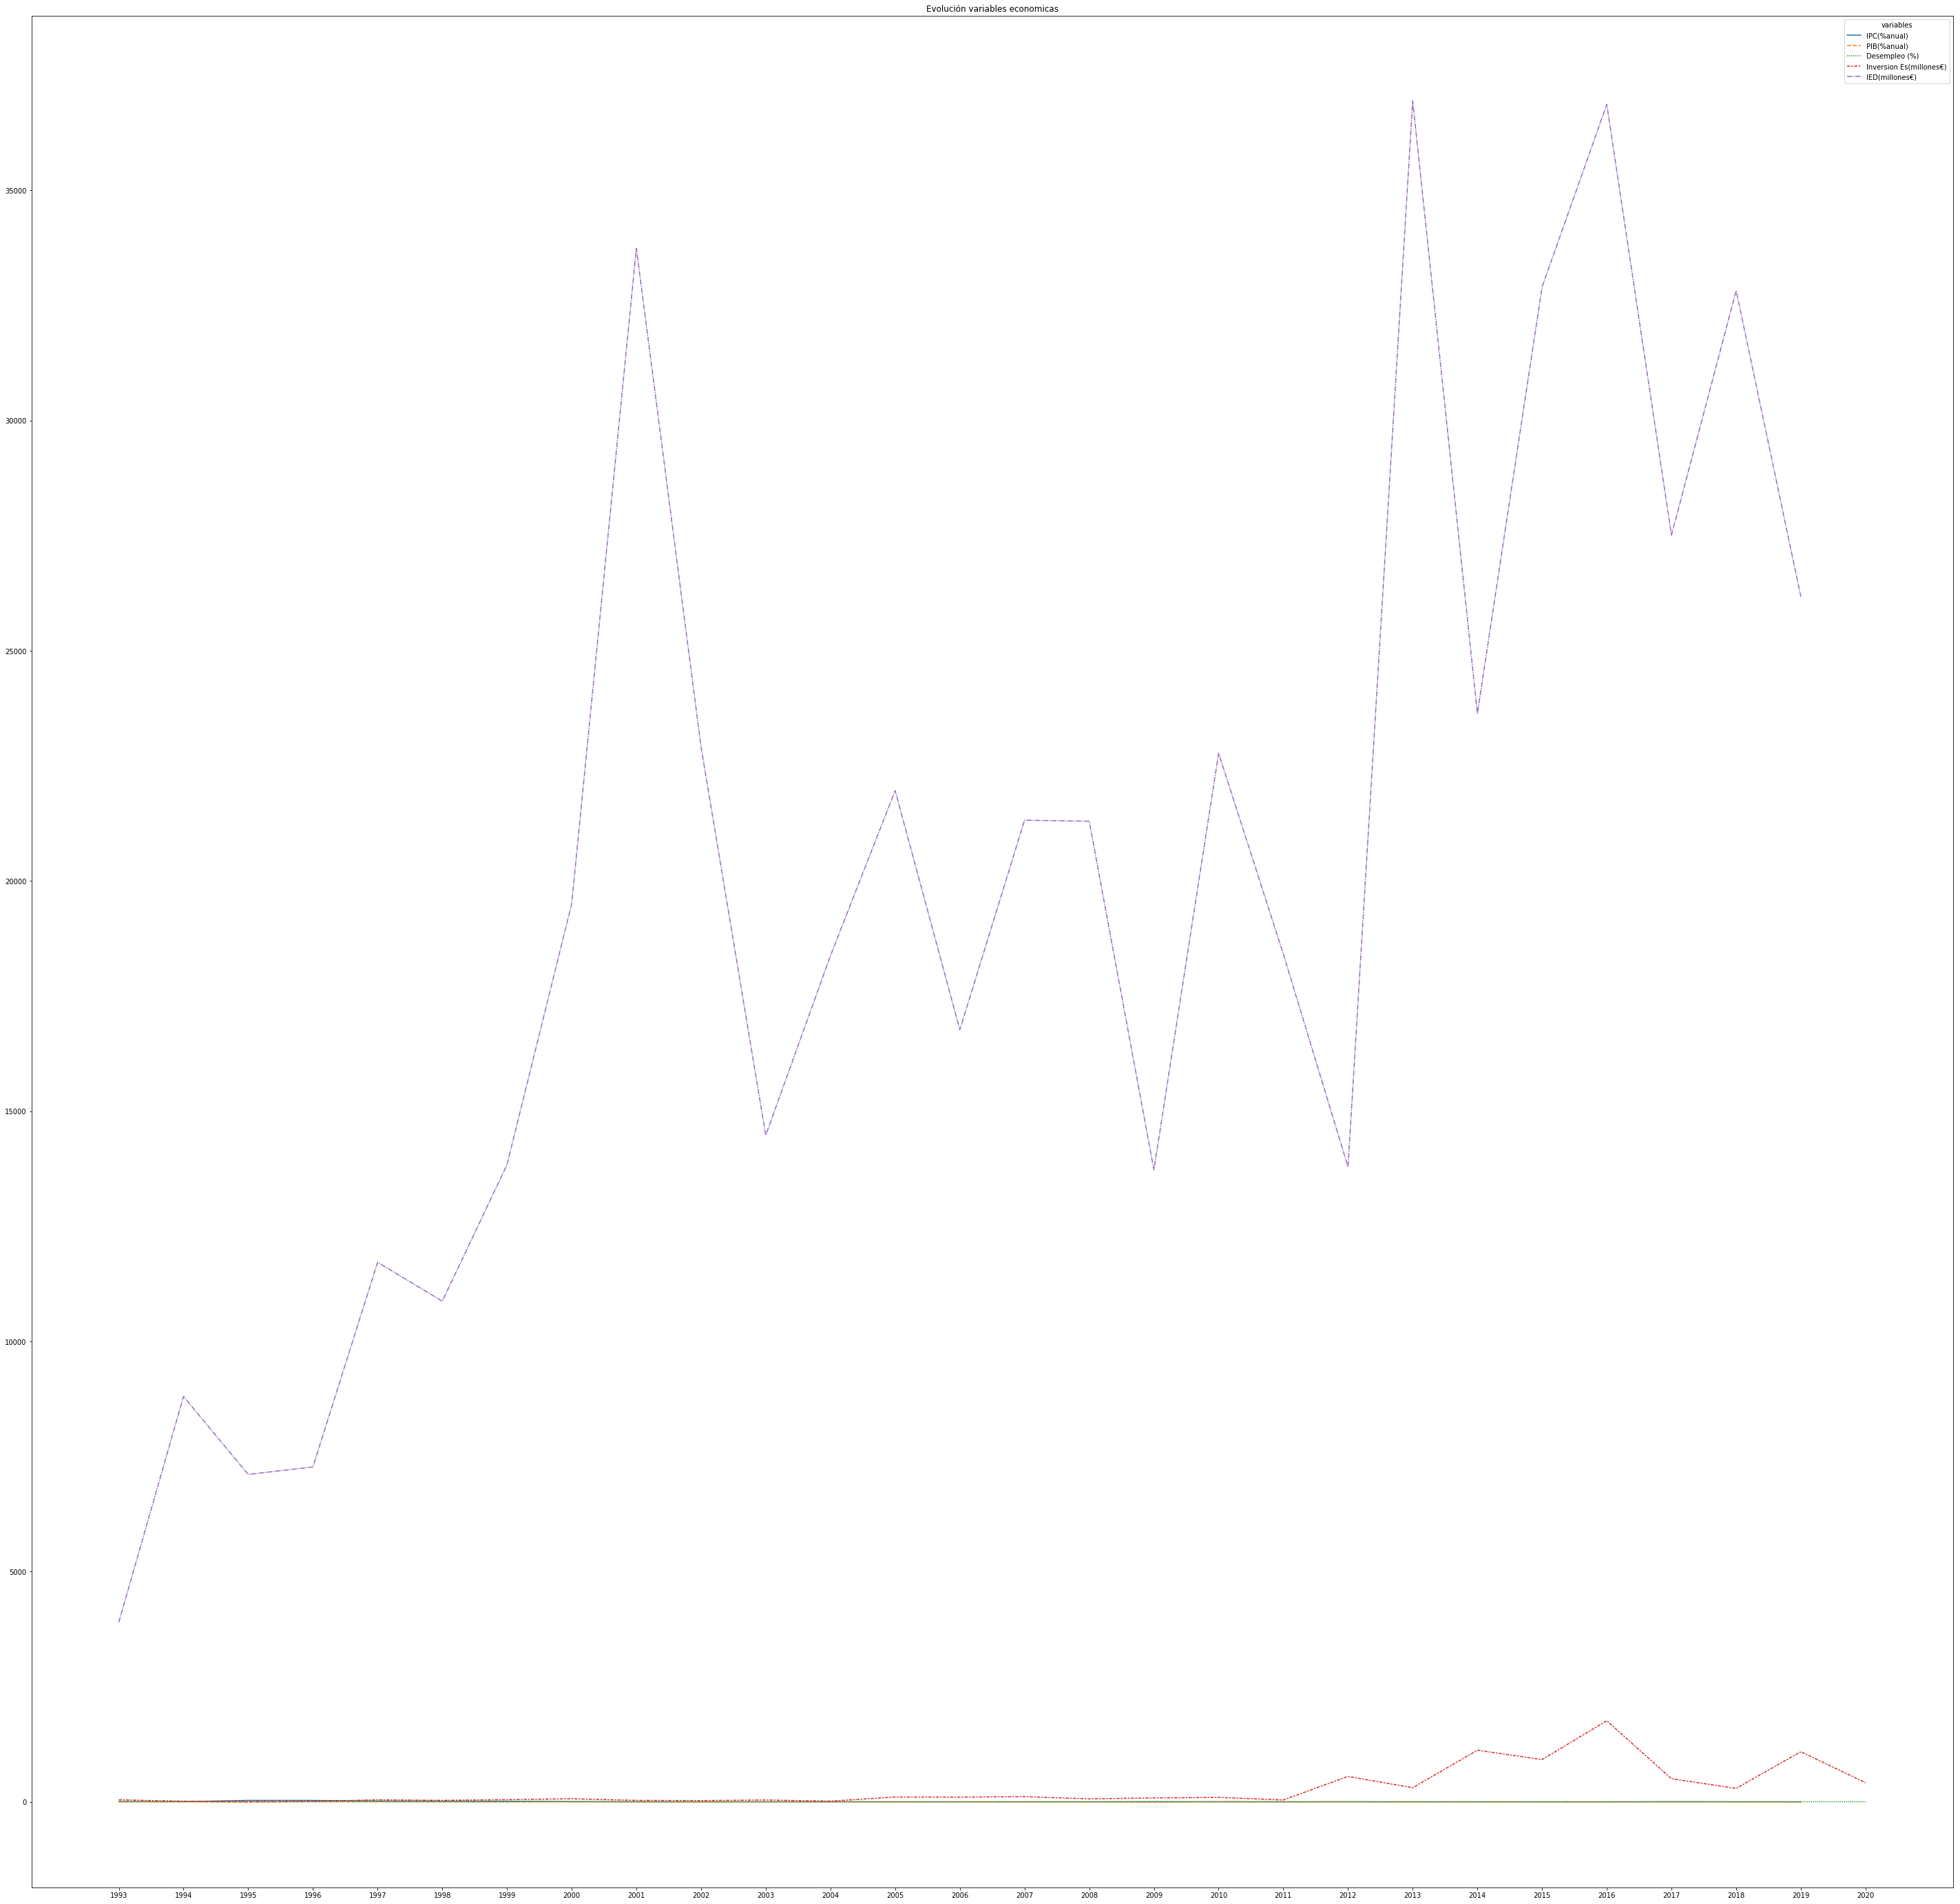

In [5]:
plt.figure(figsize=(50,50))
sns.lineplot(data=df_var)
plt.title('Evolución variables economicas')